Question 1

In [35]:
# isConnected is added to Undirected Graph
import matplotlib.pyplot as plt
import queue
import copy

class UndirectedGraph:

    def __init__(self, n = float('inf')):
        self.n = n                              # Number of vertices of a graph V = {1, 2, 3 .., n}
        self.m = 0
        self.adjList = dict()                   # adjacency list

        if n != float('inf'):
            for i in range(1, n+1):
                self.adjList[i] = []
    
    def addNode(self, u):
        if u >= 1 and u <= self.n :
            if self.adjList.get(u) != None:
                # The node is already present
                pass
            else:
                self.adjList[u] = []
            return
        # Out of bounds
        if u > self.n:
            raise Exception("Node index cannot exceed number of nodes")
        raise Exception("Node index cannot be less than 1")
    
    # Adding undirected edge uv
    def addEdge(self, u, v):
        # Adding an edge to a graph implies adding nodes to the garph
        self.addNode(u)
        self.addNode(v)

        for vertex in self.adjList[u]:
            if vertex == v:
                # Edge is already present
                return
            
        self.m += 1
        self.adjList[u].append(v)
        self.adjList[v].append(u)
        return
    
    # Opeator overloading of '+'
    def __add__ (self, inp):
        if type(inp) == int:
            new_graph = copy.deepcopy(self)
            new_graph.addNode(inp)
            return new_graph
        if len(inp) != 2:
            raise Exception("Error for adding edge we need two elements")
        new_graph = copy.deepcopy(self)
        new_graph.addEdge(inp[0], inp[1])
        return new_graph
    
    def __str__(self):
        ans = "Graph with "
        if self.n == float("inf"):
            ans += str(len(self.adjList.keys())) + " Nodes and " + str(self.m) + " edges\nNeighbours of the nodes are belows:\n"
            for u in self.adjList.keys():
                if len(self.adjList[u]) == 0:
                    ans += "Node " + str(u) + ": {}\n"
                else :
                    ans += "Node " + str(u) + ": " + str(set(self.adjList[u])) + "\n"
        else:
            ans += str(self.n) + " Nodes and " + str(self.m) + " edges\nNeighbours of the nodes are belows:\n"
            for u in range(1, self.n+1):
                if self.adjList.get(u) == None:
                    ans += "Node " + str(u) + ": {}\n"
                else :
                    if len(self.adjList[u]) == 0:
                        ans += "Node " + str(u) + ": {}\n"
                    else :
                        ans += "Node " + str(u) + ": " + str(set(self.adjList[u])) + "\n"
        return ans
    
    def plotDegDist(self):
        
        n = len(self.adjList.keys())

        # Calculating number of nodes with each degree
        # 0 <= degree of a node <= n-1
        degrees = [0 for _ in range(n)]
        total_degree = 0

        for ele in self.adjList.keys():
            degrees[len(self.adjList[ele])] += 1
            total_degree += len(self.adjList[ele])

        # Plotting fraction of nodes vs Node degree
        plt.axvline(x = total_degree/n, color = 'r', label = "Avg. node degree")
        plt.scatter([i for i in range(n)], [ele/n for ele in degrees], color = 'b', label = "Actual degree distribution", s = 10)
    
        # Adding title
        plt.title("Node Degree Distribution")

        # Adding xlabel and ylabel
        plt.xlabel("Node degree")
        plt.ylabel("Fraction of nodes")
        
        # Adding legend
        plt.legend()

        # Adding grid
        plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5)

        # Show plot
        plt.show()
        
        return
    
    def isConnected(self):
        vertices = list(self.adjList.keys())
        n = len(vertices)

        if n <= 1:
            # vaciously true
            return True
        
        # Measuring the size of the component in which vertex vertices[0] is present
        visited = dict()
        q = queue.Queue()
        q.put(vertices[0])
        size = 1
        visited[1] = True
        
        while q.empty() == False:
            u = q.get()
            if self.adjList.get(u) == None:
                break
            for v in self.adjList[u]:
                if visited.get(v) == None:
                    visited[v] = True
                    q.put(v) 
                    size += 1
        return size == n
    
    def oneTwoComponentSizes(self):
        highest = 0
        second_highest = 0

        vertices = []
        n = 0
        if self.n == float("inf"):
            vertices = list(self.adjList.keys())
        else :
            vertices = [i+1 for i in range(self.n)]
        n = len(vertices)

        # Measuring the size of the component in which vertex vertices[0] is present
        visited = dict()

        for u in vertices:
            if visited.get(u) == None:
                visited[u] = True
                q = queue.Queue()
                q.put(u)
                size = 1
        
                while q.empty() == False:
                    u = q.get()
                    if self.adjList.get(u) == None:
                        break
                    for v in self.adjList[u]:
                        if visited.get(v) == None:
                            visited[v] = True
                            q.put(v) 
                            size += 1
                
                if highest < size:
                    second_highest = highest
                    highest = size
                elif second_highest < size:
                    second_highest = size
        return [highest, second_highest]

In [9]:
# The following code should create a free graph
g = UndirectedGraph()
print(g)

Graph with 0 Nodes and 0 edges
Neighbours of the nodes are belows:



In [10]:
# The following code should create a graph with 10 vertices
g = UndirectedGraph(10)
print(g)

Graph with 10 Nodes and 0 edges
Neighbours of the nodes are belows:
Node 1: {}
Node 2: {}
Node 3: {}
Node 4: {}
Node 5: {}
Node 6: {}
Node 7: {}
Node 8: {}
Node 9: {}
Node 10: {}



In [11]:
g = UndirectedGraph()
g.addNode(1)
g.addNode(100)
print(g)

Graph with 2 Nodes and 0 edges
Neighbours of the nodes are belows:
Node 1: {}
Node 100: {}



In [12]:
g = UndirectedGraph(10)
g.addNode(4)
print(g)

Graph with 10 Nodes and 0 edges
Neighbours of the nodes are belows:
Node 1: {}
Node 2: {}
Node 3: {}
Node 4: {}
Node 5: {}
Node 6: {}
Node 7: {}
Node 8: {}
Node 9: {}
Node 10: {}



In [13]:
g = UndirectedGraph(10)
g.addNode(11)

Exception: Node index cannot exceed number of nodes

In [14]:
# The following code adds an undirected edge (10,25) to the graph
g = UndirectedGraph()
g.addEdge(10, 25)
print(g)

Graph with 2 Nodes and 1 edges
Neighbours of the nodes are belows:
Node 10: {25}
Node 25: {10}



In [15]:
# The following code adds an undirected edge (1,2) to the graph
g = UndirectedGraph(10)
g.addEdge(1,2)
print(g)

Graph with 10 Nodes and 1 edges
Neighbours of the nodes are belows:
Node 1: {2}
Node 2: {1}
Node 3: {}
Node 4: {}
Node 5: {}
Node 6: {}
Node 7: {}
Node 8: {}
Node 9: {}
Node 10: {}



In [18]:
# The following code adds node 10 to the graph
g = UndirectedGraph()
s = g + 10
print("g=", g, "s=", s, sep = '\n')

g=
Graph with 0 Nodes and 0 edges
Neighbours of the nodes are belows:

s=
Graph with 1 Nodes and 0 edges
Neighbours of the nodes are belows:
Node 10: {}



In [21]:
# The following code adds an undirected edge (12,15) to the graph
g = UndirectedGraph()
s = g + (12, 15)
print("g=", g, "s=", s, sep = '\n')

g=
Graph with 0 Nodes and 0 edges
Neighbours of the nodes are belows:

s=
Graph with 2 Nodes and 1 edges
Neighbours of the nodes are belows:
Node 12: {15}
Node 15: {12}



In [22]:
# The following code adds undirected edges (1,2) and (3,4) to the graph
g = UndirectedGraph(10)
g = g + (1, 2)
g = g + (3, 4)
print(g)

Graph with 10 Nodes and 2 edges
Neighbours of the nodes are belows:
Node 1: {2}
Node 2: {1}
Node 3: {4}
Node 4: {3}
Node 5: {}
Node 6: {}
Node 7: {}
Node 8: {}
Node 9: {}
Node 10: {}



In [23]:
g = UndirectedGraph()
print(g)

Graph with 0 Nodes and 0 edges
Neighbours of the nodes are belows:



In [104]:
g = UndirectedGraph(5)
print(g)

Graph with 5 Nodes and 0 edges
Neighbours of the nodes are belows:
Node 1: {}
Node 2: {}
Node 3: {}
Node 4: {}
Node 5: {}



In [105]:
g = UndirectedGraph()
g = g + 10
g = g + (11, 12)
print(g)

Graph with 3 Nodes and 1 edges
Neighbours of the nodes are belows:
Node 10: {}
Node 11: {12}
Node 12: {11}



In [106]:
g = UndirectedGraph(5)
g = g + (1, 2)
g = g + (3, 4)
g = g + (1, 4)
print(g)

Graph with 5 Nodes and 3 edges
Neighbours of the nodes are belows:
Node 1: {2, 4}
Node 2: {1}
Node 3: {4}
Node 4: {1, 3}
Node 5: {}



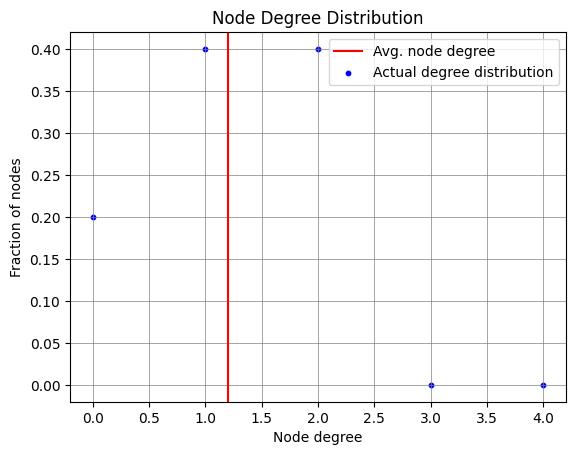

In [26]:
g = UndirectedGraph(5)
g = g + (1, 2)
g = g + (3, 4)
g = g + (1, 4)

g.plotDegDist()

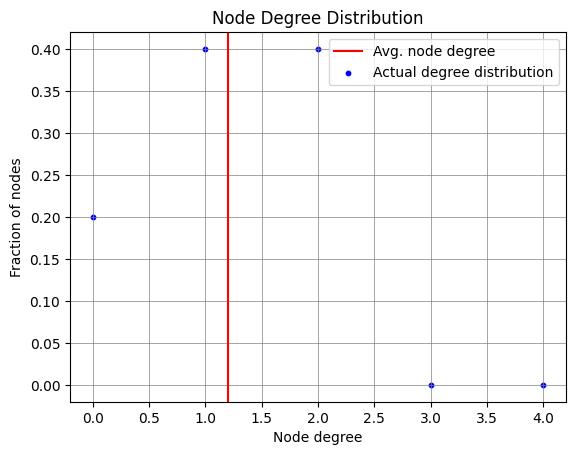

In [27]:
g = UndirectedGraph()
g = g + 100
g = g + (1, 2)
g = g + (1, 100)
g = g + (100, 3)
g = g + 20

g.plotDegDist()

Question 2

In [28]:
import random
class ERRandomGraph(UndirectedGraph):

    def sample(self, p):
        vertices = []
        if self.n == float("inf"):
            vertices = list(self.adjList.keys())
        else :
            vertices = [i+1 for i in range(self.n)]
        n = len(vertices)

        # shuffeling the verices randomly
        random.shuffle(vertices)

        for i in range(n):
            for j in range(i+1, n):
                # No self loops
                if random.uniform(0, 1) < p:
                    # add edge
                    self.addEdge(vertices[i], vertices[j])
        return

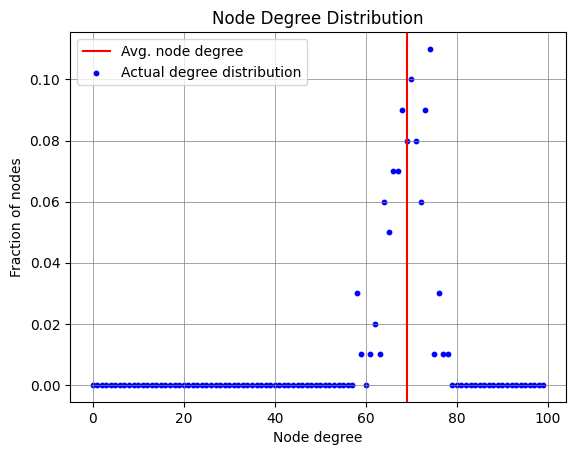

In [31]:
# The following code creates a G(100, 0.7) random graph and
# plots its degree distribution
g = ERRandomGraph(100)
g.sample(0.7)
g.plotDegDist()

# Average degree of a node = p*(n-1)
# because for each node there are n-1 edges possible each with probability p
# So here 0.7*(100 -1) = 69.3

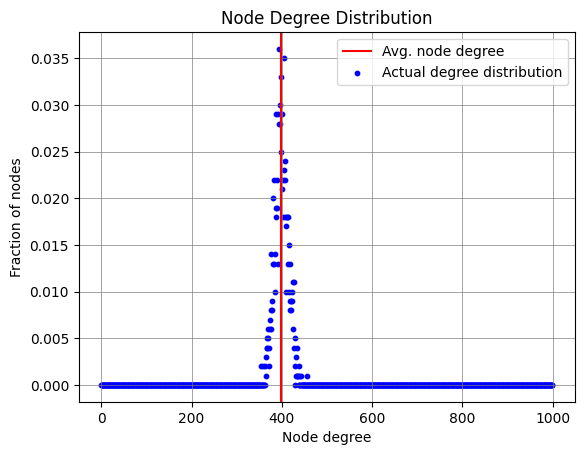

In [32]:
# The following code creates a G(1000, 0.4) random graph and
# plots its degree distribution
g = ERRandomGraph(1000)
g.sample(0.4)
g.plotDegDist()

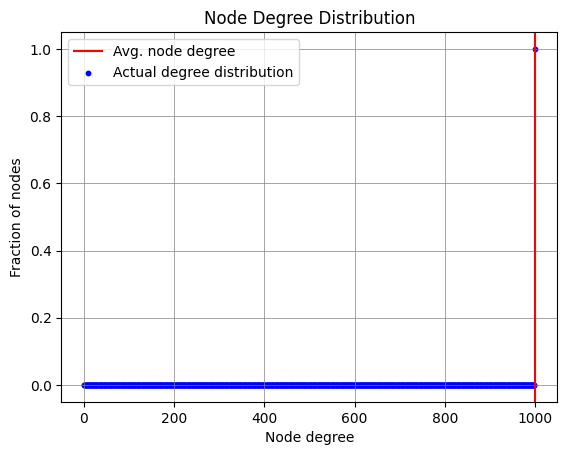

In [33]:
# The following code creates a G(1000, 1) random graph and
# plots its degree distribution
g = ERRandomGraph(1000)
g.sample(1)
g.plotDegDist()

Question 3

In [36]:
g = UndirectedGraph(5)
g = g + (1, 2)
g = g + (2, 3)
g = g + (3, 4)
g = g + (3, 5)
print(g.isConnected())

True


In [37]:
g = UndirectedGraph(5)
g = g + (1, 2)
g = g + (2, 3)
g = g + (3, 5)
print(g.isConnected())
print(g)

False
Graph with 5 Nodes and 3 edges
Neighbours of the nodes are belows:
Node 1: {2}
Node 2: {1, 3}
Node 3: {2, 5}
Node 4: {}
Node 5: {3}



In [42]:
import math

def verification(n):
    theoretical_threshold = math.log(n)/n
    
    p_values = []
    fractions = []
    p = 0.0
    diff = 0.001
    while p <= min(theoretical_threshold + 0.10, 1):
        simulation_count = 1000
        count = 0
        for _ in range(simulation_count):
            g = ERRandomGraph(n)
            g.sample(p)
            count += g.isConnected()
        p_values.append(p)
        fractions.append(count/simulation_count)
        p += diff
    
    
    plt.axvline(x = theoretical_threshold, color = 'r', label = "Theoretical threshold")
    plt.plot(p_values, fractions, color = 'b')
    
    # Adding title
    plt.title("Connectedness of a G(" + str(n) + ",p) as function of p")

    # Adding legend
    plt.xlabel("p")
    plt.ylabel("Fraction of runs G(" + str(n) +",p) is connected")
    plt.legend()

    # Adding grid
    plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5)

    # Show plot
    plt.show()

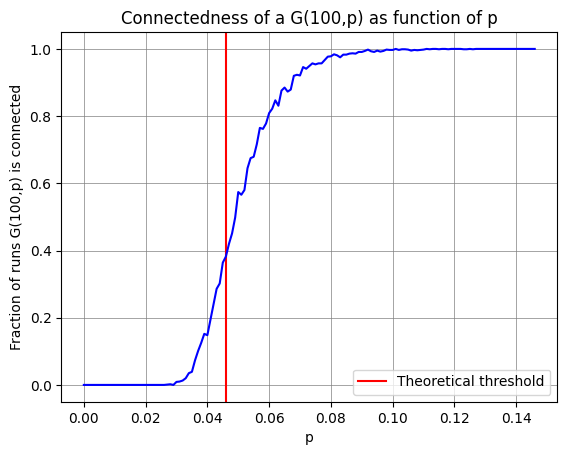

In [43]:
# Erd˝os-R´enyi random graph G(100, p) is almost surely connected only if p > ln(100)/100
verification(100)

Question 4

In [44]:
g = UndirectedGraph(6)
g = g + (1, 2)
g = g + (3, 4)
g = g + (6, 4)
print(g.oneTwoComponentSizes())

[3, 2]


In [45]:
g = ERRandomGraph(100)
g.sample(0.01)
print(g.oneTwoComponentSizes())

[20, 11]


In [46]:
# If p < 0.001, the Erd˝os-R´enyi random graph G(1000, p) will almost surely have only small connected components. 
# On the other hand, if p > 0.001, almost surely, there will be a single giant component containing a positive fraction of the vertices.

import math

def gaint_component_verification(n):
    theoretical_threshold = 1/n
    connectedness_threshold = math.log(n)/n
    p_values = []
    largest_sizes = []
    second_largest_sizes = []
    diff = 1/(n*10)
    p = 0
    while p <= min(theoretical_threshold + diff*100, 1):
        runs = 100
        largest = 0
        smallest = 0
        for _ in range(runs):
            g = ERRandomGraph(n)
            g.sample(p)
            li = g.oneTwoComponentSizes()
            largest += li[0]
            smallest += li[1]
            
        p_values.append(p)
        largest_sizes.append(largest/runs)
        second_largest_sizes.append(smallest/runs)
        p += diff
    
    # Plotting
    plt.axvline(x = theoretical_threshold, color = 'r', label = "Largest connected component threshold (1/n)")
    plt.axvline(x = connectedness_threshold, color = 'orange', label = "Connectedness threshold  ln(n)/n")
    plt.plot(p_values, largest_sizes, color = 'g', label = "Largest connected component")
    plt.plot(p_values, second_largest_sizes, color = 'b', label = "2nd largest connected component")
    
    
    # Adding title
    plt.title("Connectedness of a G(" + str(n) + ",p) as function of p")

    # Adding legend
    plt.xlabel("p")
    plt.ylabel("Fraction of runs G(" + str(n) +",p) is connected")
    plt.legend()

    # Adding grid
    plt.grid(color = 'grey', linestyle = '-', linewidth = 0.5)

    # Show plot
    plt.show()

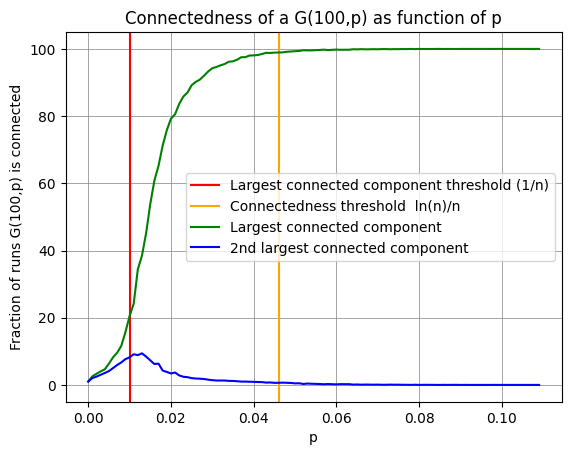

In [47]:
gaint_component_verification(100)

Question 5

In [100]:
import networkx as nx
import matplotlib.pyplot as plt
import random
import queue

# still not complete

class Lattice:
    '''This class represents lattice (2-d grid)'''
    def __init__(self, n):
        self.n = n
        # Create a 2-D lattice graph
        self.G = nx.grid_graph(dim=[n, n])
        
        # Remove all edges
        self.G.remove_edges_from(self.G.edges())

    '''Percolate the graph'''
    def percolate(self, p):
        # Two neighbours are open with probability p
        nodes = list(self.G.nodes)
        for i in range(self.n*self.n):
            x, y = nodes[i]
            if x != self.n-1:
                # add egde to right
                if random.uniform(0, 1) <= p:
                    # close
                    self.G.add_edge((x, y), (x+1, y))

            if y != self.n-1:
                # add edge to up 
                if random.uniform(0, 1) <= p:
                    # close
                    self.G.add_edge((x, y), (x, y+1))
        
        return
    
    '''Returns True if a path exists from top most layer to the bottom most layer, else return False'''
    def existsTopDownPath(self):
        # Top most layer y = n-1
        # Bottom most layer y = 0
        visited = dict()
        y = self.n-1
        q = queue.Queue()
        for x in range(self.n):
            q.put((x, y))
            visited[(x, y)] = True
        
        while q.empty() == False:
            (x, y) = q.get()
            if y == 0:
                return True
            
            edges = self.G.edges((x, y))
            for e in edges:
                u, v = e
                if visited.get(v) == None:
                    visited[v] = True
                    q.put(v)
        return False

    '''Display the shortest path from '''
    def showPaths(self):
        pos = dict([(node, node) for node in self.G.nodes()])
        nx.draw(self.G, pos, edge_color = 'red',  node_size = 0.1)
        for x in range(self.n):
            edges = self.bfs(x, self.n-1)
            # print(edges)
            nx.draw_networkx_edges(self.G, pos, edgelist=edges, edge_color='darkgreen')
        
        plt.show()
            

    
    def bfs(self, x, y):
        visited = dict()
        path = dict()
        q = queue.Queue()
        q.put((x, y))
        visited[(x, y)] = True
        path[(x, y)] = []

        max_length = 0
        alternate_path = []
        while(q.empty() == False):
            node = q.get()
            edges = self.G.edges(node)
            for u, v in edges:
                if visited.get(v) == None:
                    q.put(v)
                    visited[v] = True
                    path[v] = path[node] + [(node,  v), ]
                    if v[1] == 0:
                        return path[v]
        return list()
            
    '''Shows the Grid Graph'''
    def show(self):
        
        # Create a layout for our nodes
        pos = {node: node for node in self.G.nodes()}
        
        # Draw nodes
        nx.draw(self.G, pos, edge_color = 'red', node_size = 0.1)
        
        # Display the plot
        plt.title( str(self.n) + " x " + str(self.n) + " Grid Graph")
        plt.axis('equal')  # Equal aspect ratio
        plt.axis('off')    # Turn off axis
        plt.show()

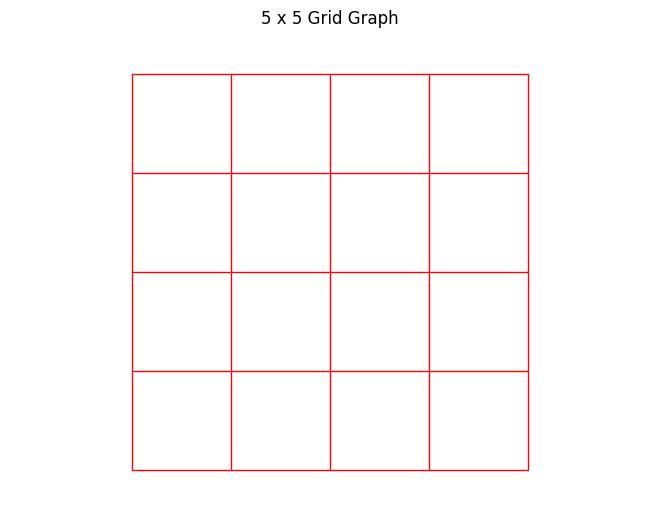

True


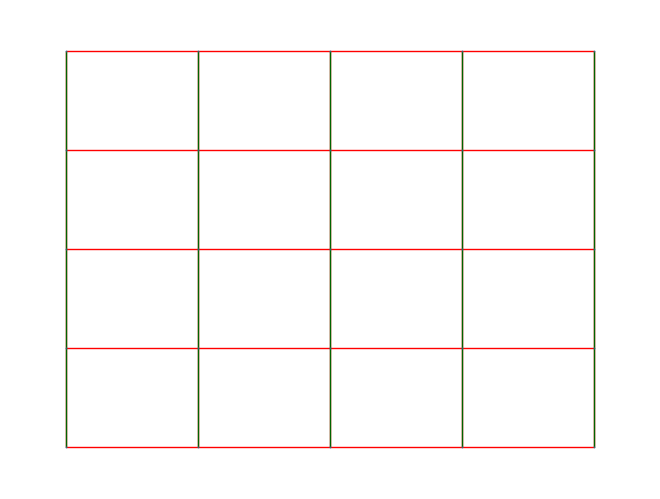

In [92]:
l = Lattice(5)
l.percolate(1)
l.show()
print(l.existsTopDownPath())
l.showPaths()

In [93]:
# The following code will create a 10 x 10 grid graph
l = Lattice(10)

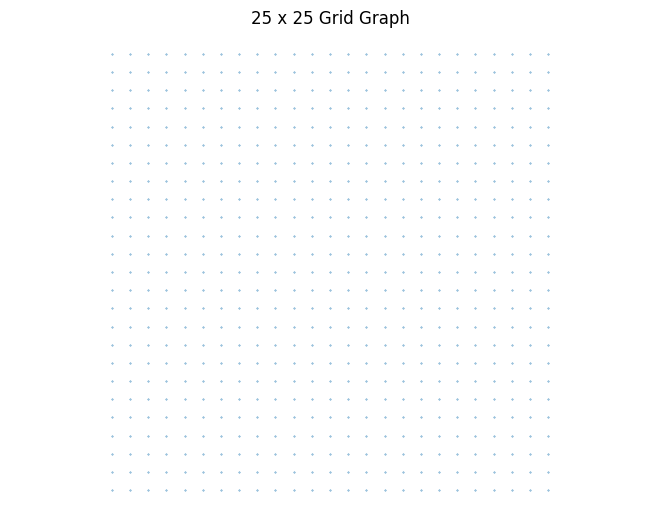

In [94]:
l = Lattice(25)
l.show()

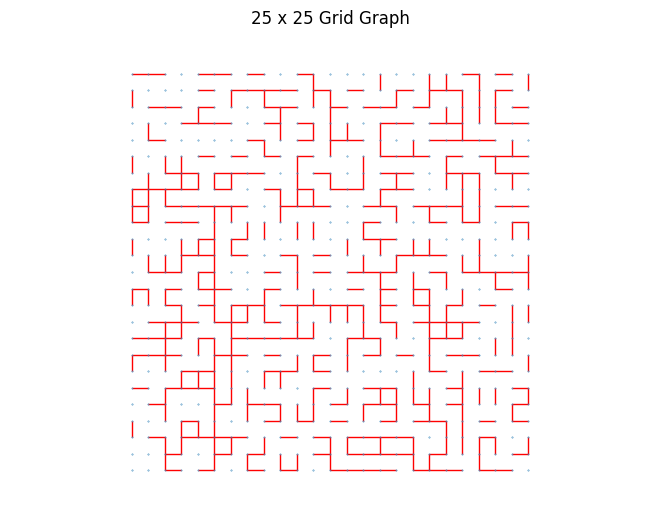

False


In [101]:
l = Lattice(25)
l.percolate(0.4)
l.show()
print(l.existsTopDownPath())

# need to fix

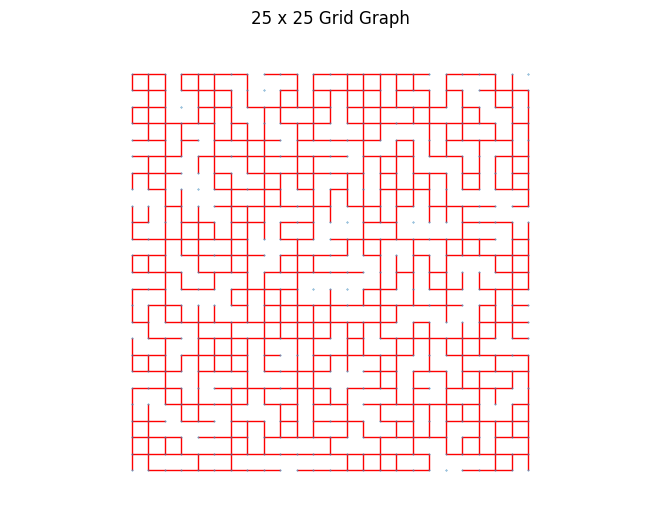

True


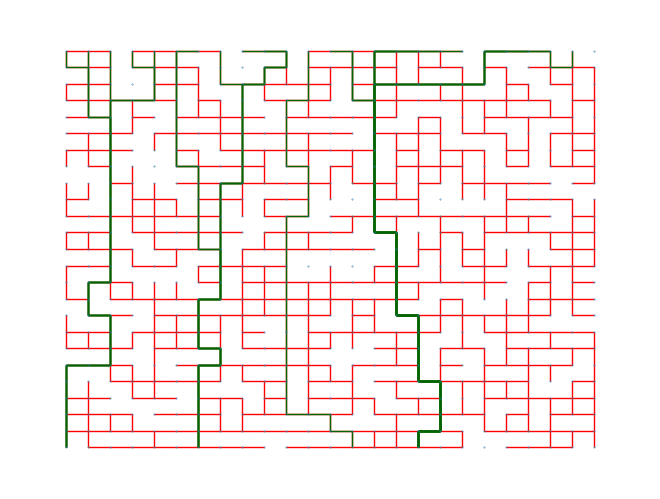

In [103]:
l = Lattice(25)
l.percolate(0.7)
l.show()
print(l.existsTopDownPath())
l.showPaths()

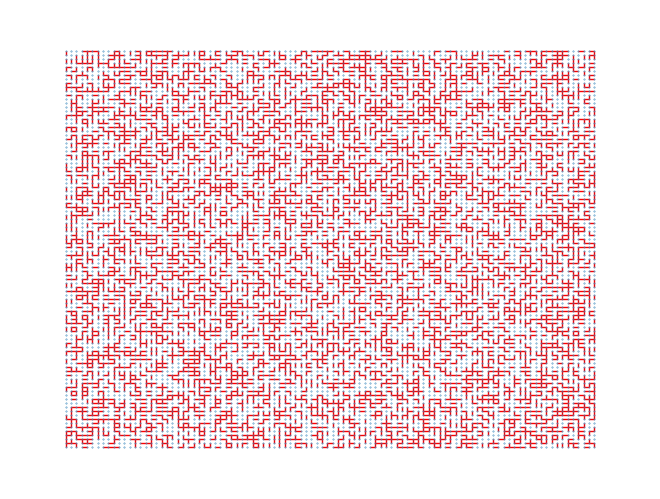

In [104]:
l = Lattice(100)
l.percolate(0.4)
l.showPaths()

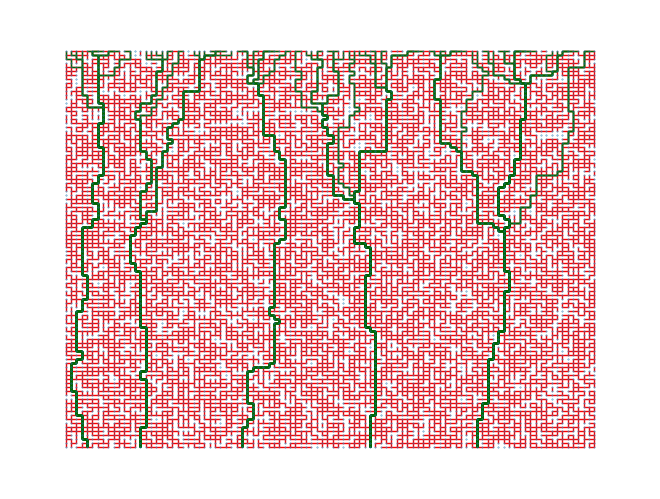

In [105]:
l = Lattice(100)
l.percolate(0.7)
l.showPaths()

In [19]:
import networkx as nx

# Define the dimension of the grid graph
n = 5

# Create a grid graph
G = nx.grid_graph(dim=[n, n])

# Find all edges incident on node (0, 0)
edges_incident_on_00 = list(G.edges((0, 0)))

print("Edges incident on (0, 0):", edges_incident_on_00)


Edges incident on (0, 0): [((0, 0), (1, 0)), ((0, 0), (0, 1))]


In [6]:
import copy
b = a()
c = copy.deepcopy(b)
c.arr[0] = 2

[(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (2, 0), (2, 1), (2, 2), (2, 3), (2, 4), (3, 0), (3, 1), (3, 2), (3, 3), (3, 4), (4, 0), (4, 1), (4, 2), (4, 3), (4, 4)]


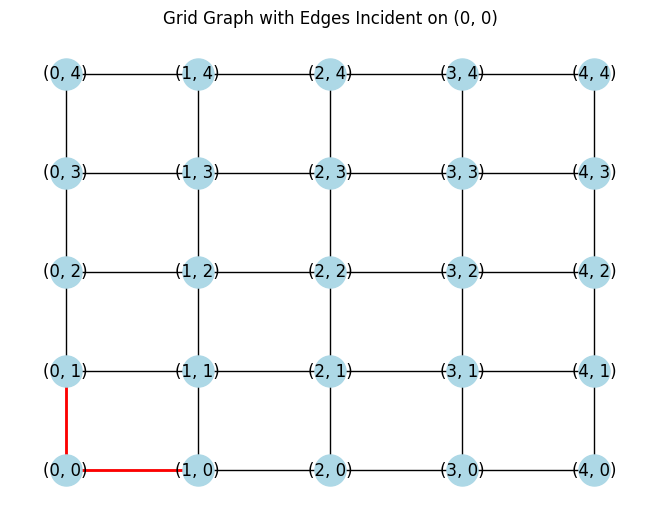

In [21]:
import networkx as nx
import matplotlib.pyplot as plt

# Define the dimension of the grid graph
n = 5

# Create a grid graph
G = nx.grid_graph(dim=[n, n])

# Find all edges incident on node (0, 0)
edges_incident_on_00 = list(G.edges((0, 0)))
print(G.nodes())
# Draw the grid graph
pos = dict((node, node) for node in G.nodes())  # Position nodes as (x,y) tuples
nx.draw(G, pos, with_labels=True, node_size=500, node_color='lightblue')

# Highlight edges incident on (0, 0)
nx.draw_networkx_edges(G, pos, edgelist=edges_incident_on_00, edge_color='red', width=2)

plt.title('Grid Graph with Edges Incident on (0, 0)')
plt.show()
